In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YFtwixKqmtAUazxzomLI")
project = rf.workspace("cse475").project("eye-diseases-1edmw")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to eye-diseases-1 in yolov8:: 100%|██████████| 4812/4812 [00:00<00:00, 8951.96it/s]


In [5]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.7/8062.4 GB disk)


In [10]:
pip install ultralytics --upgrade


Note: you may need to restart the kernel to use updated packages.


In [6]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

In [5]:
!yolo task=detect mode=train model=yolov8s.pt data=/kaggle/working/eye-diseases-1/data.yaml epochs=100 imgsz=640 batch=32 lr0=0.005 momentum=0.95 weight_decay=0.001 cos_lr=True plots=True

100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 147MB/s]
Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/eye-diseases-1/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False,

In [15]:
!yolo task=detect mode=train model=yolov8s.pt data=/kaggle/working/eye-diseases-1/data.yaml epochs=1 imgsz=640 batch=32 name=train_yolov8


Ultralytics 8.3.53 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/eye-diseases-1/data.yaml, epochs=1, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train_yolov82, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

In [8]:
import os

# Check the contents of the 'runs/detect/train' folder
train_dir = '/kaggle/working/runs/detect/train'
os.listdir(train_dir)  # List the files in the train directory


['results.csv',
 'P_curve.png',
 'val_batch0_pred.jpg',
 'val_batch1_labels.jpg',
 'weights',
 'events.out.tfevents.1734927502.47a0e073aa31.111.0',
 'R_curve.png',
 'val_batch1_pred.jpg',
 'args.yaml',
 'results.png',
 'F1_curve.png',
 'val_batch0_labels.jpg',
 'labels.jpg',
 'train_batch1.jpg',
 'confusion_matrix.png',
 'train_batch0.jpg',
 'val_batch2_labels.jpg',
 'PR_curve.png',
 'train_batch2.jpg',
 'confusion_matrix_normalized.png',
 'val_batch2_pred.jpg',
 'labels_correlogram.jpg']

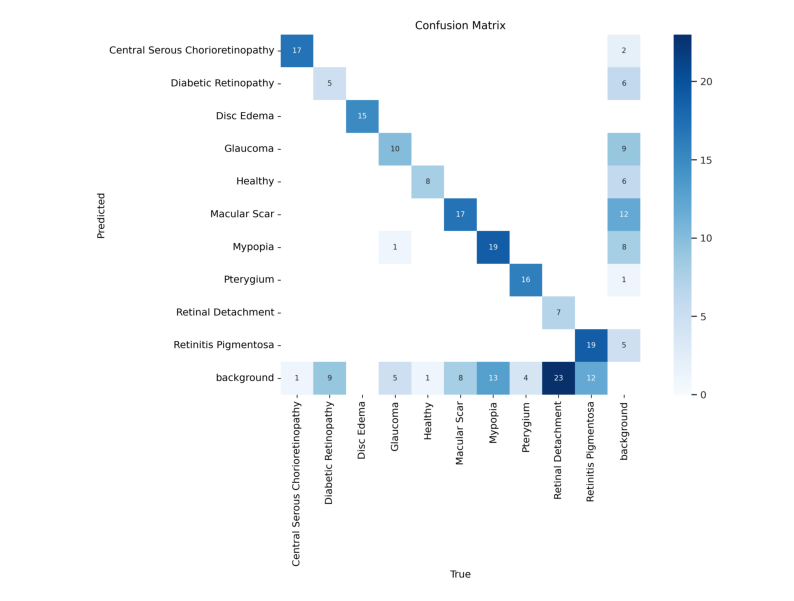

In [13]:
import matplotlib.pyplot as plt
import cv2

# Path to your confusion matrix image
image_path = '/kaggle/working/runs/detect/train/confusion_matrix.png'

# Load the image
img = cv2.imread(image_path)

# Check if image is loaded correctly
if img is None:
    print("Error: Image not found at", image_path)
else:
    # Convert the image from BGR to RGB (OpenCV uses BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()


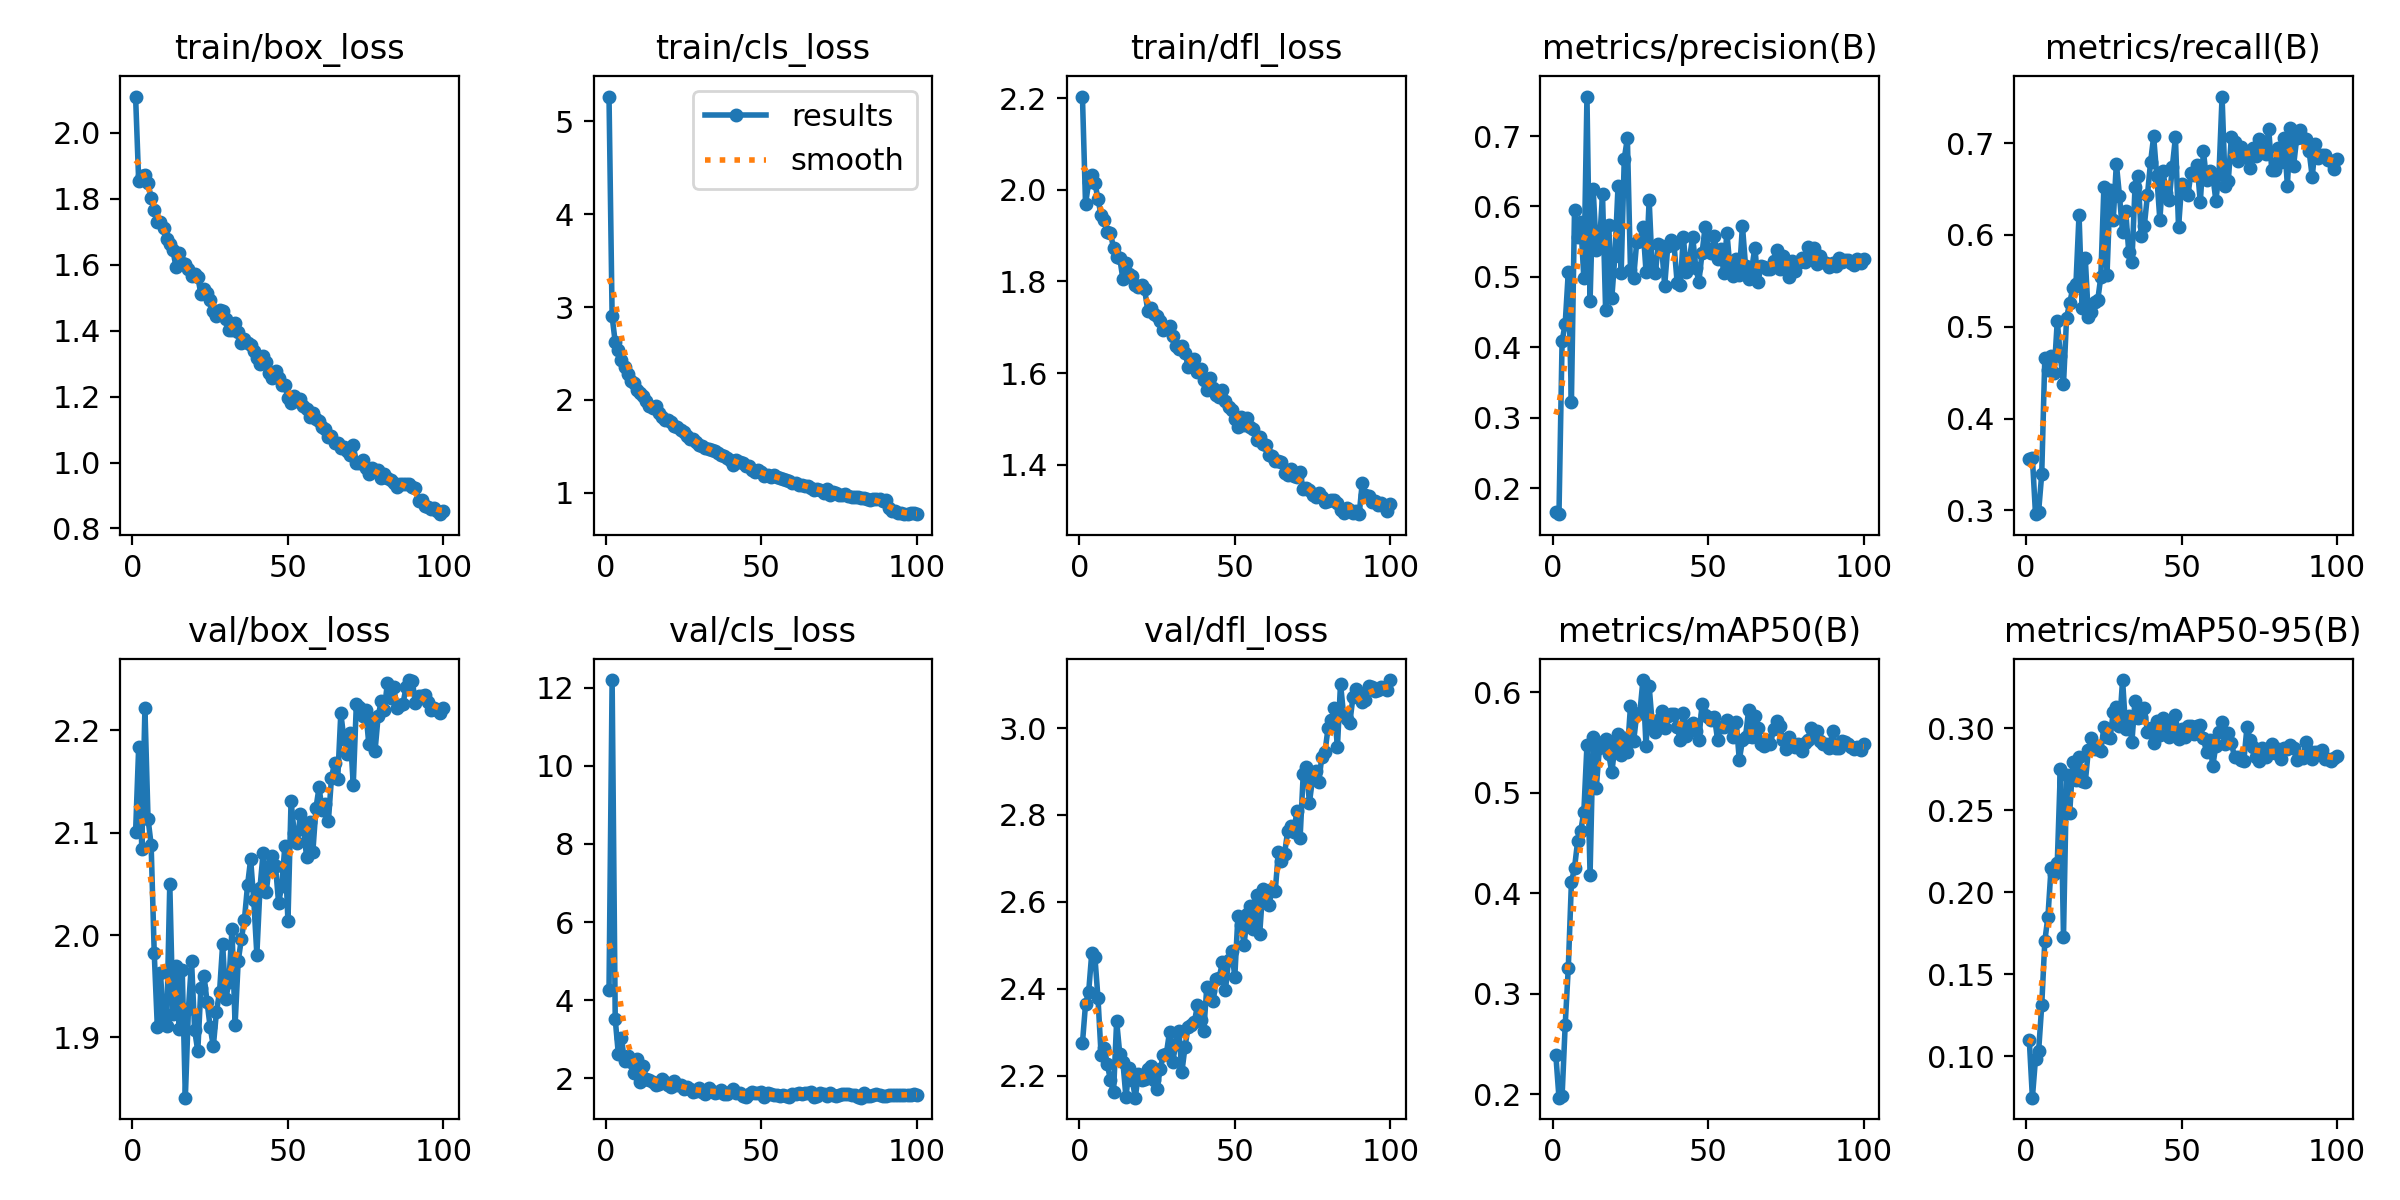

In [21]:
from IPython.display import Image


# Display the image
Image('/kaggle/working/runs/detect/train/results.png', width=600)


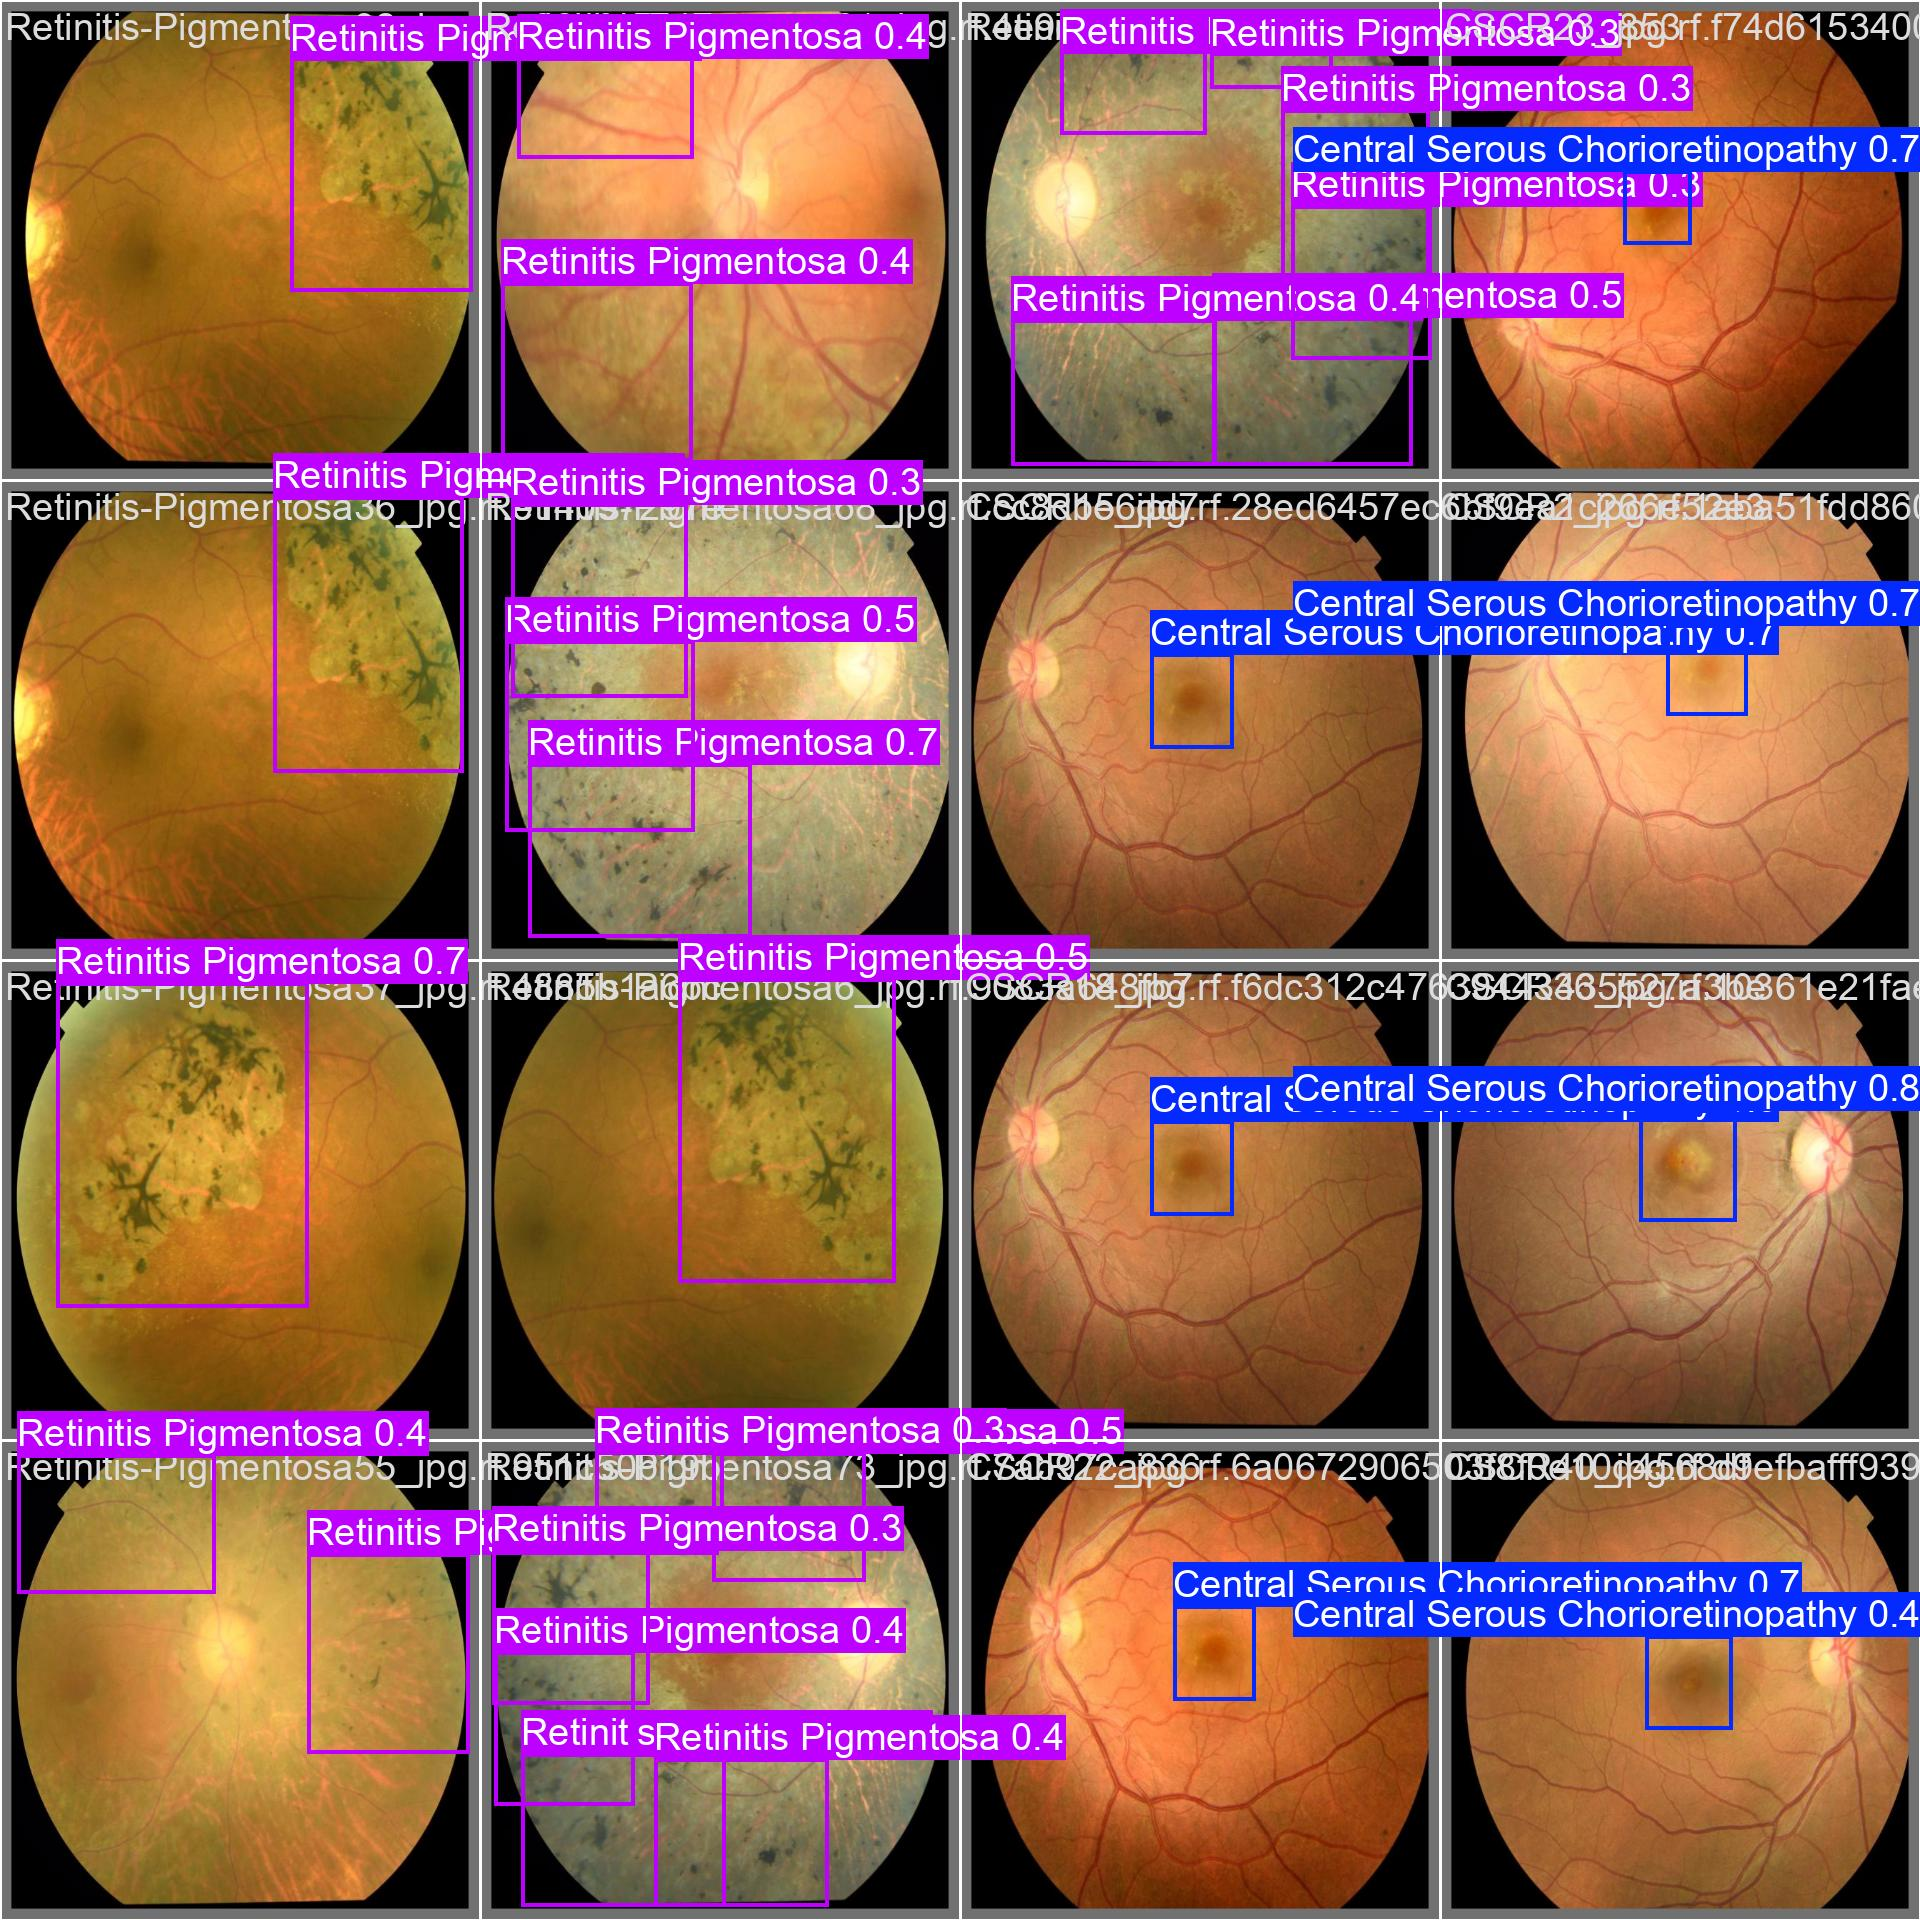

In [20]:
Image!yolo task=detect mode=train model=yolov8s.pt data=/kaggle/working/eye-diseases-1/data.yaml epochs=100 imgsz=640 batch=32 lr0=0.005 momentum=0.95 weight_decay=0.001 cos_lr=True plots=True(filename='/kaggle/working/runs/detect/train/val_batch0_pred.jpg', width=600)

In [17]:
import pandas as pd
from tabulate import tabulate

# Load the CSV data
# Adjust this path based on where your CSV file is located in Kaggle
results_csv_path = '/kaggle/working/runs/detect/train/results.csv'  # Adjust path if needed
results_df = pd.read_csv(results_csv_path)

# Print the columns to check for any discrepancies
print("Columns in CSV:", results_df.columns)

# Assuming column names are correct, extract the necessary metrics
accuracy_values = results_df['metrics/mAP50(B)']  # Adjusted if needed
precision_values = results_df['metrics/precision(B)']  # Adjusted if needed
recall_values = results_df['metrics/recall(B)']  # Adjusted if needed

# Calculate F1 scores
f1_scores = 2 * (precision_values * recall_values) / (precision_values + recall_values)

# Calculate average metrics
average_accuracy = accuracy_values.mean()
average_precision = precision_values.mean()
average_recall = recall_values.mean()
average_f1_score = f1_scores.mean()

# Create a dictionary with the metrics
metrics = {
    'Model': ['YOLOv8'],
    'Accuracy': [f"{average_accuracy:.2%}"],
    'Precision': [f"{average_precision:.2%}"],
    'Recall': [f"{average_recall:.2%}"],
    'F1 score': [f"{average_f1_score:.2%}"]
}

# Convert the dictionary into a DataFrame
average_metrics_df = pd.DataFrame(metrics)

# Print the result in a grid format
print(tabulate(average_metrics_df, headers='keys', tablefmt='grid'))


Columns in CSV: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
+----+---------+------------+-------------+----------+------------+
|    | Model   | Accuracy   | Precision   | Recall   | F1 score   |
+====+=========+============+=============+==========+============+
|  0 | YOLOv8  | 53.57%     | 52.24%      | 62.10%   | 56.23%     |
+----+---------+------------+-------------+----------+------------+


In [23]:
!git clone https://github.com/rigvedrs/YOLO-V8-CAM.git

Cloning into 'YOLO-V8-CAM'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 82 (delta 9), reused 14 (delta 5), pack-reused 57 (from 1)
Receiving objects: 100% (82/82), 29.78 MiB | 38.35 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [25]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import torch    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import torchvision.transforms as transforms
from PIL import Image
import io

In [26]:
%cd /kaggle/working/YOLO-V8-CAM

/kaggle/working/YOLO-V8-CAM


In [28]:
!pip install ttach

In [ ]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [32]:
img = cv2.imread('/kaggle/working/eye-diseases-1/test/images/CSCR10_jpg.rf.06873b8e38c6e5ffa506b6d955cfce89.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [33]:
os.listdir('/kaggle/working')

['.virtual_documents',
 'eye-diseases-1',
 'yolo11n.pt',
 'runs',
 'YOLO-V8-CAM',
 'yolov8s.pt']

In [34]:
import ultralytics
from ultralytics import YOLO
model = YOLO('/kaggle/working/yolov8s.pt') 
model.cpu()

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [36]:
os.listdir('/kaggle/working/runs/detect')

['train', 'predict']

In [37]:
target_layers =[model.model.model[-2]]

In [38]:
cam = EigenCAM(model, target_layers,task='od')


0: 640x640 (no detections), 375.1ms
Speed: 3.1ms preprocess, 375.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


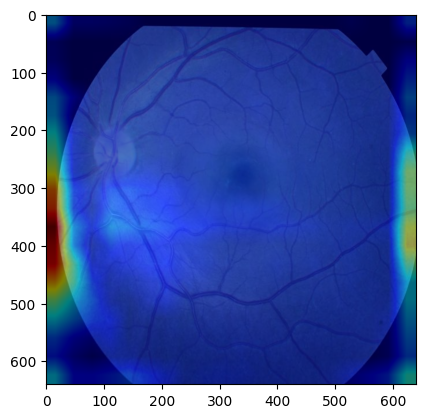

In [40]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()


0: 640x640 (no detections), 373.4ms
Speed: 7.5ms preprocess, 373.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


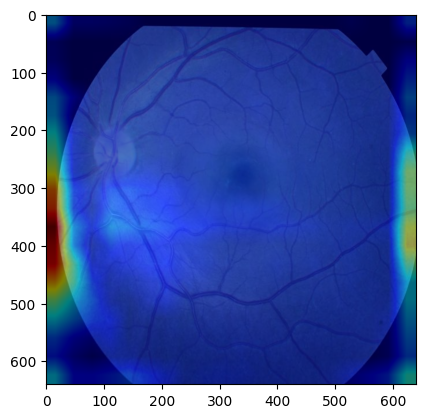

In [45]:
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

In [46]:
target_layers =[model.model.model[-2], model.model.model[-3], model.model.model[-4]]


0: 640x640 1 Central Serous Chorioretinopathy, 17.9ms
Speed: 2.8ms preprocess, 17.9ms inference, 124.8ms postprocess per image at shape (1, 3, 640, 640)


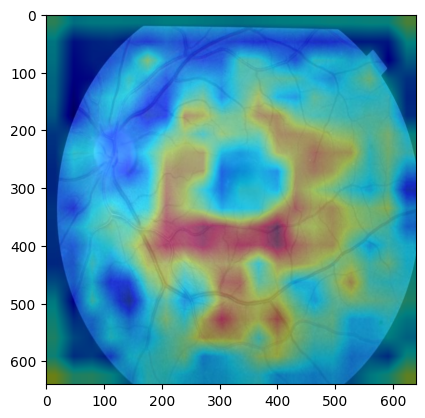

In [47]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

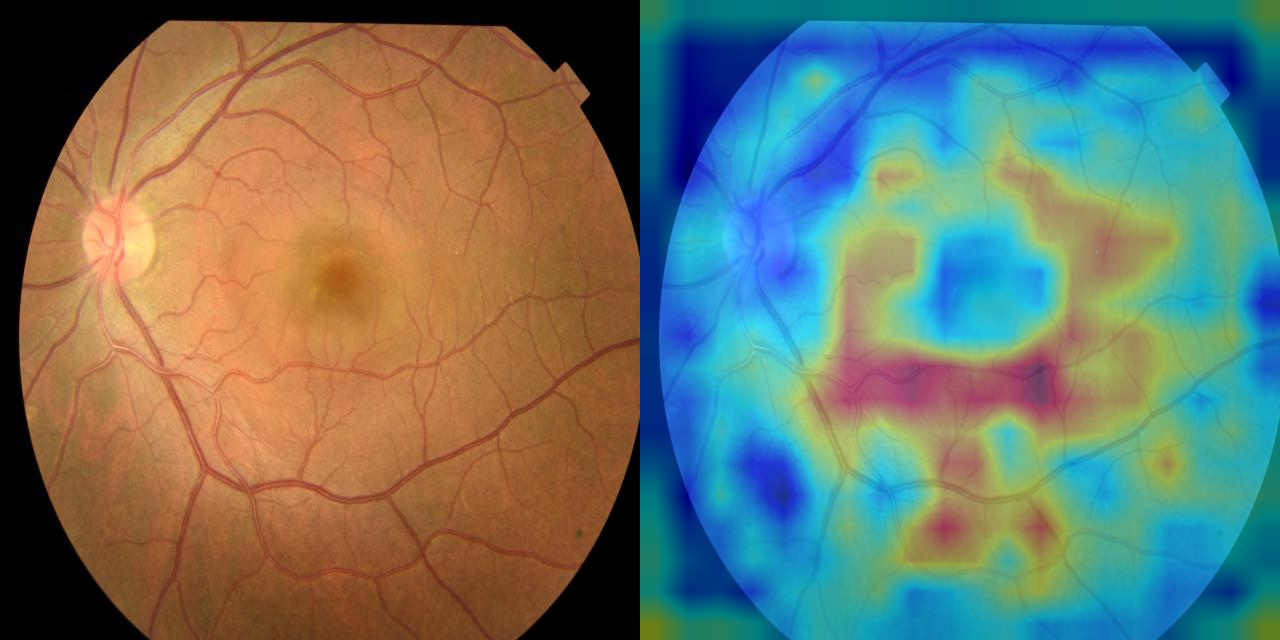

In [48]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))


0: 640x640 (no detections), 16.2ms
Speed: 8.1ms preprocess, 16.2ms inference, 26.4ms postprocess per image at shape (1, 3, 640, 640)


train yolov9

In [17]:
import pandas as pd
from tabulate import tabulate

# Manually input the data into a dictionary
data = {
    'Model': ['YOLOv8', 'YOLOv9'],  
    'Accuracy': [53.57, 54.24],          
    'Precision': [52.24, 52.02],          
    'Recall': [62.10, 60.56],             
    'F1 score': [56.23, 55.6]            
}

# Convert the dictionary into a DataFrame
comparison_df = pd.DataFrame(data)

# Save the table as a CSV file
comparison_df.to_csv('/kaggle/working/manual_model_comparison.csv', index=False)

# Print the table in a grid format
print("Model Comparison Table:")
print(tabulate(comparison_df, headers='keys', tablefmt='grid'))

# Find the model with the highest accuracy
best_model_row = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
best_model = best_model_row['Model']
best_accuracy = best_model_row['Accuracy']

print(f"\nThe model with the highest accuracy is {best_model} with an accuracy of {best_accuracy:.2f}%.")


Model Comparison Table:
+----+---------+------------+-------------+----------+------------+
|    | Model   |   Accuracy |   Precision |   Recall |   F1 score |
+====+=========+============+=============+==========+============+
|  0 | YOLOv8  |      53.57 |       52.24 |    62.1  |      56.23 |
+----+---------+------------+-------------+----------+------------+
|  1 | YOLOv9  |      54.24 |       52.02 |    60.56 |      55.6  |
+----+---------+------------+-------------+----------+------------+

The model with the highest accuracy is YOLOv9 with an accuracy of 54.24%.


In [ ]:
!yolo task=detect mode=train model=yolov9s.pt data=/kaggle/working/eye-diseases-1/data.yaml epochs=100 imgsz=640 batch=32 lr0=0.005 momentum=0.95 weight_decay=0.001 cos_lr=True plots=True